# DMQC Report: WMO 4900883

## Current status and metadata: 

- APEX float inactive as of September 2011
- Deployed November 2006
- Completed 174 cycles in North Atlantic, appears to have been deployed off Southeast Grand Bank on NL AZMP
- In 'A' mode, gain of 0.9917 applied
- Calculated mean gain of 1.011

In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.dates import datestr2num
import matplotlib.pyplot as plt

from netCDF4 import Dataset

from pathlib import Path
import numpy as np
import pandas as pd
import bgcArgoDMQC as bgc

wmo = 4900883 # insert WMO number here
fig_path = Path('../../../figures/') / f'{wmo}' # where to save figures
fig_path.mkdir(exist_ok=True)
bgc.io.get_argo(wmo, local_path=bgc.io.Path.ARGO_PATH) # download the data to ensure you have up to date files
flt = bgc.sprof(wmo)
flt.clean()
gains = flt.calc_gains(ref='WOA') # calculate gain, can change to ref='NCEP' if in-air data is available
print(np.nanmean(gains))

\Users\GordonC\Documents\data\Argo\dac\meds\4900883\4900883_Rtraj.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900883\4900883_Sprof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900883\4900883_meta.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900883\4900883_prof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900883\4900883_tech.nc
Extracting WOA data for Jan
Extracting WOA data for Feb
Extracting WOA data for Mar
Extracting WOA data for Apr
Extracting WOA data for May
Extracting WOA data for Jun
Extracting WOA data for Jul
Extracting WOA data for Aug
Extracting WOA data for Sep
Extracting WOA data for Oct
Extracting WOA data for Nov
Extracting WOA data for Dec
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data -

## DOXY Audit Status

- Few points in the middle of the mission where there is some "spikiness" in the float surface saturation
- Cycles between 91-102 are flagged, but not all

In [3]:
audit_file = list(Path('../../../audit/').glob('DOXY_WOA*'))[-1]
df = pd.read_csv(audit_file, sep='\t', header=25)
df = df.loc[df.WMO == wmo]
df['date'] = [datestr2num(t) for t in df['profile date']]
print(df['cycle'])

4     91
5     94
6     95
7     98
8    101
9    102
Name: cycle, dtype: int64


## Visual QC

Check the profiles and any anomolous looking saturation values.

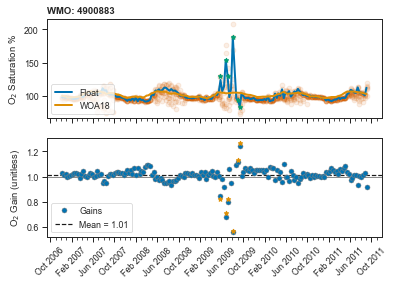

In [3]:
g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(df['date'], df['flt O2 %sat'], '*')
g.axes[1].plot(df['date'], df['WOA G_raw'], '*', zorder=3)
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)
fig_path = Path('../../figures/') / f'{wmo}' # where to save figures
fig_path.mkdir(exist_ok=True)
g.fig.savefig(fig_path / 'gain_initial.png', bbox_inches='tight', dpi=250)

Figure 1: Top panel: Float oxygen percent saturation (blue line) compared to WOA percent saturation (orange line), with DOXY audit flagged cycle percent saturation (green stars) and raw float percent saturation (orange circles). Bottom panel: calculated gains (blue dots) and flagged gains from DOXY audit (orange stars).

Notes: Lots of spiking in the profiles flagged by the audit, though not all of those profiles are flagged and some look reasonable. Outside of that mostly looks good. 

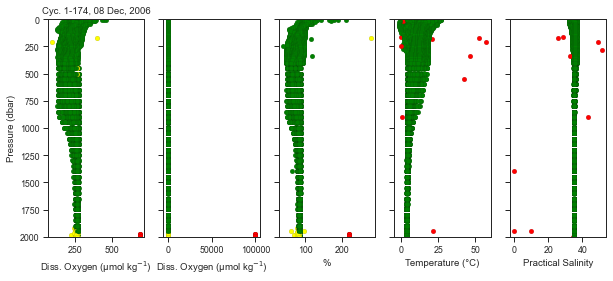

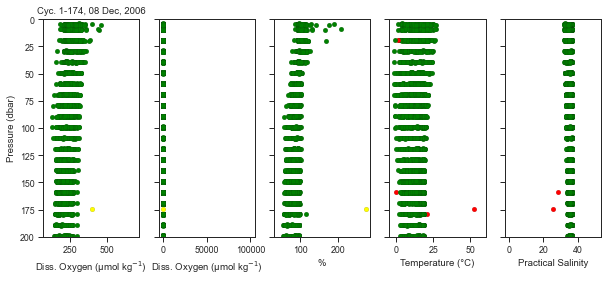

In [4]:
flt.reset()
g = flt.plot('qcprofiles', varlist=['DOXY', 'DOXY_ADJUSTED', 'O2Sat', 'TEMP', 'PSAL'])
g.fig.savefig(fig_path / 'qcprofiles.png', bbox_inches='tight', dpi=250)
g = flt.plot('qcprofiles', varlist=['DOXY', 'DOXY_ADJUSTED', 'O2Sat', 'TEMP', 'PSAL'])
g.axes[0].set_ylim((200,0))
g.fig.savefig(fig_path / 'qcprofiles_shallow.png', bbox_inches='tight', dpi=250)

Figures 2,3: Profiles coloured by QC flag (1-2, green, 3, yellow, 4, red) on difference depth scales.

Notes: Can't really see the potentially problematic profiles based on the gain plot, though maybe a couple high points in the very surface. The points flagged as 3 shallower than 250 should probably be downgraded to 4. 

In [6]:
bad_profiles = flt.df.loc[flt.df.CYCLE.isin(df['cycle'])]
bad_profiles

,PRES,PRES_QC,TEMP,TEMP_QC,PSAL,PSAL_QC,DOXY_QC,DOXY_ADJUSTED,DOXY_ADJUSTED_QC,DOXY,...,PSAL_dPRES,SDN,PSAL_ADJUSTED,DOXY_dPRES,LONGITUDE,TEMP_dPRES,LATITUDE,TEMP_ADJUSTED_QC,DOXY_ADJUSTED_ERROR,PSAL_ADJUSTED_ERROR
6480,4.500000,1,11.024,1,33.437000,1,1,347.943146,1,350.862732,...,0.0,14390.527778,33.451973,0.0,-48.296997,0.0,41.293999,1,10.747310,0.01
6481,9.400000,1,10.744,1,33.402000,1,1,353.468292,1,356.434235,...,0.0,14390.527778,33.416954,0.0,-48.296997,0.0,41.293999,1,10.809686,0.01
6482,19.500000,1,1.221,4,32.687000,1,1,384.880981,1,388.110504,...,0.0,14390.527778,NaN,0.0,-48.296997,0.0,41.293999,4,13.482664,99999.00
6483,29.200001,1,8.267,1,33.903999,1,1,300.669678,1,303.192596,...,0.0,14390.527778,33.919151,0.0,-48.296997,0.0,41.293999,1,11.331094,0.01
6484,39.500000,1,8.947,1,34.082001,1,1,280.043671,1,282.393524,...,0.0,14390.527778,34.097240,0.0,-48.296997,0.0,41.293999,1,11.144938,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,1848.900024,1,3.873,1,34.919998,1,1,250.116211,1,252.214935,...,0.0,14500.354861,34.935764,0.0,-46.506989,0.0,41.504002,1,10.929336,0.01
7268,1899.199951,1,3.840,1,34.919998,1,1,250.762482,1,252.866623,...,0.0,14500.354861,34.935757,0.0,-46.506989,0.0,41.504002,1,10.905733,0.01
7269,1949.300049,1,3.797,1,34.919998,1,1,251.435776,1,253.545578,...,0.0,14500.354861,34.935764,0.0,-46.506989,0.0,41.504002,1,10.884969,0.01
7270,1999.099976,1,3.743,1,34.915001,1,3,237.018372,3,239.007187,...,0.0,14500.354861,34.930756,0.0,-46.506989,0.0,41.504002,1,10.784136,0.01


30


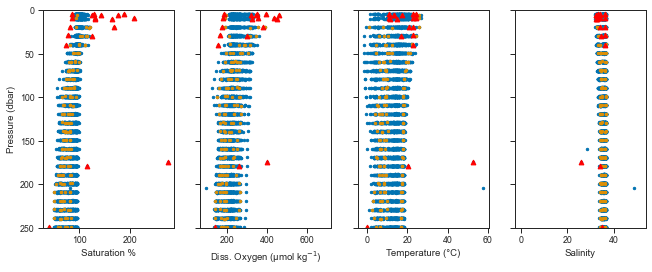

In [11]:
fig, axes = plt.subplots(1, 4, sharey=True)
ax = axes[0]
flt.rm_fillvalue()
ax.plot(flt.df.O2Sat, flt.df.PRES, '.')
ax.plot(bad_profiles.O2Sat, bad_profiles.PRES, '.')
ax.set_ylabel('Pressure (dbar)')
ax.set_xlabel('Saturation %')

# ax.axvline(123.5)
# ax.axvline(118)
# ax.axvline(75)
# ax.axvline(80)
# ax.axvline(90)
# ax.axvline(45)
# ax.axvline(110)

# ax.axhline(12)
# ax.axhline(27)
# ax.axhline(42)

bad = (flt.O2Sat > 123.5)
bad = bad | ((flt.O2Sat < 80) & (flt.PRES < 40))
bad = bad | ((flt.O2Sat < 90) & (flt.PRES < 27))
bad = bad | ((flt.O2Sat < 42) & (flt.PRES > 200) & (flt.PRES < 300))
bad = bad | ((flt.O2Sat > 110) & (flt.PRES > 150) & (flt.PRES < 500))
bad = bad | ((flt.O2Sat < 65) & (flt.PRES > 1300))
bad = bad | ((flt.O2Sat > 95) & (flt.PRES > 1300))
print(sum(bad))
ax.plot(flt.df.O2Sat.loc[bad], flt.df.PRES.loc[bad], '^', color='red')

ax = axes[1]
flt.rm_fillvalue()
ax.plot(flt.df.DOXY, flt.df.PRES, '.')
ax.plot(bad_profiles.DOXY, bad_profiles.PRES, '.')
ax.set_ylim((250,0))
ax.set_xlabel('Diss. Oxygen ($\mathregular{\mu}$mol kg$^{-1}$)')

ax.plot(flt.df.DOXY.loc[bad], flt.df.PRES.loc[bad], '^', color='red')

ax = axes[2]
flt.rm_fillvalue()
ax.plot(flt.df.TEMP, flt.df.PRES, '.')
ax.plot(bad_profiles.TEMP, bad_profiles.PRES, '.')
ax.set_ylim((250,0))
ax.set_xlabel(f'Temperature ({chr(176)}C)')

ax.plot(flt.df.TEMP.loc[bad], flt.df.PRES.loc[bad], '^', color='red')

ax = axes[3]
flt.rm_fillvalue()
ax.plot(flt.df.PSAL, flt.df.PRES, '.')
ax.plot(bad_profiles.PSAL, bad_profiles.PRES, '.')
ax.set_ylim((250,0))
ax.set_xlabel(f'Salinity')

ax.plot(flt.df.PSAL.loc[bad], flt.df.PRES.loc[bad], '^', color='red')

fig.set_size_inches(1.8*fig.get_figwidth(), fig.get_figheight())
fig.savefig(fig_path / 'bad_pts_o2sat_doxy.png', bbox_inches='tight', dpi=250)



Figure 4: highlight potentially bad profiles, use horizontal/vertical lines to define "bad" indices. 

In [12]:
# get the mean gain
flt.update_field('DOXY_QC', 3, where=flt.DOXY_QC == 1)
flt.update_field('DOXY_QC', 3, where=flt.DOXY_QC == 0)
flt.update_field('DOXY_ADJUSTED', flt.gain*flt.DOXY)
flt.update_field('DOXY_ADJUSTED_ERROR', bgc.calc_fixed_doxy_adjusted_error(flt.PSAL, flt.TEMP, flt.PRES))
flt.update_field('DOXY_ADJUSTED_QC', flt.DOXY_QC)
flt.update_field('DOXY_ADJUSTED_QC', 1, where=flt.DOXY_ADJUSTED_QC == 3)
flt.update_field('DOXY_ADJUSTED_QC', 1, where=flt.DOXY_ADJUSTED_QC == 0)
flt.update_field('DOXY_ADJUSTED_QC', 4, where=flt.TEMP_ADJUSTED_QC == 4)
flt.update_field('DOXY_ADJUSTED_QC', 3, where=flt.PSAL_ADJUSTED_QC == 4)
flt.update_field('DOXY_QC', 4, where=bad)
flt.update_field('DOXY_ADJUSTED_QC', 4, where=bad)

flt.clean()
new_gains = flt.calc_gains(ref='WOA')
print(np.nanmean(new_gains))


Calculating gains using WOA surface data and float O2 percent saturation...
1.0147794079375279


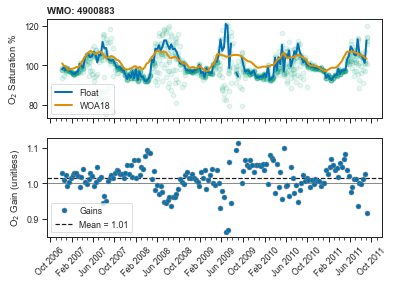

In [15]:
g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)
# g.axes[0].plot(df['date'], df['flt O2 %sat'], '*')
# g.axes[1].plot(df['date'], df['WOA G_raw'], '*', zorder=3)
g.fig.savefig(fig_path / 'gain_final.png', bbox_inches='tight', dpi=250)

There is still a bit of spikiness in that area but I am hesitant to remove it as it looks well grouped with the rest of the profiles.

In [16]:
flt.export_files(data_mode='D')

Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900883/profiles/BD4900883_001.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900883/profiles/BD4900883_002.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900883/profiles/BD4900883_003.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900883/profiles/BD4900883_004.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900883/profiles/BD4900883_005.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900883/profiles/BD4900883_006.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900883/profiles/BD4900883_007.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900883/profiles/BD4900883_008.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900883/profiles/BD4900883_009.nc...done
Working on